The requirements of EDA Case Study


#### EDA Case Study

**Introduction**

This case study aims to give an idea of applying EDA in a real business scenario. In this case study, we will develop a basic understanding of risk analytics in banking and financial services and understand how data is used to minimize the risk of losing money while lending to customers.

**Business Understanding**

The loan providing companies find it hard to give loans to the people due to their insufficient or non-existent credit history. Because of that, some consumers use it as their advantage by becoming a defaulter. Suppose we work for a consumer finance company which specializes in lending various types of loans to urban customers. We will have to use EDA to analyze the patterns present in the data. This will ensure that the applicants capable of repaying the loan are not rejected.

When the company receives a loan application, the company has to decide for loan approval based on the applicant’s profile. Two types of risks are associated with the bank’s decision:

If the applicant is likely to repay the loan, then not approving the loan results in a loss of business to the company

If the applicant is not likely to repay the loan, i.e. he/she is likely to default, then approving the loan may lead to a financial loss for the company.

The data given below contains the information about the loan application at the time of applying for the loan. It contains two types of scenarios:

The client with payment difficulties: he/she had late payment more than X days on at least one of the first Y instalments of the loan in our sample,

All other cases: All other cases when the payment is paid on time.

When a client applies for a loan, there are four types of decisions that could be taken by the client/company):

Approved: The Company has approved loan Application

Cancelled: The client cancelled the application sometime during approval. Either the client changed her/his mind about the loan or in some cases due to a higher risk of the client he received worse pricing which he did not want.

Refused: The company had rejected the loan (because the client does not meet their requirements etc.).

Unused offer: Loan has been cancelled by the client but on different stages of the process.

In this case study, we will use EDA to understand how consumer attributes and loan attributes influence the tendency of default.

**Business Objectives**

This case study aims to identify patterns which indicate if a client has difficulty paying their installments which may be used for taking actions such as denying the loan, reducing the amount of loan, lending (to risky applicants) at a higher interest rate, etc. This will ensure that the consumers capable of repaying the loan are not rejected. Identification of such applicants using EDA is the aim of this case study.

In other words, the company wants to understand the driving factors (or driver variables) behind loan default, i.e. the variables which are strong indicators of default. The company can utilize this knowledge for its portfolio and risk assessment.

**Data Understanding**

This dataset has 3 files as explained below:

`application_data.csv` contains all the information of the client at the time of application.
The data is about whether a client has payment difficulties.

`previous_application.csv` contains information about the client’s previous loan data. It contains the data whether the previous application had been Approved, Cancelled, Refused or Unused offer.

`columns_description.xlsx` is data dictionary which describes the meaning of the variables.


I have given a link to the data files in a drive folder [here](https://drive.google.com/drive/folders/1YpPjU4Y12MPrMdWaNDa6rS2MNirh2FG3?usp=sharing).  I suggest unzipping them and putting them in your google drive, and link to them directly using colab and its "mount drive" functionality.

In [3]:
#Link to zien's google drive
from google.colab import drive
drive.mount('/content/drive')

#import resources
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [4]:
# Define data path
data_path = '/content/drive/MyDrive/EDA_case_study'

# List files to verify correct path
os.listdir(data_path)

['columns_description.xlsx',
 'previous_application.csv',
 'application_data.csv']

## Initial Data Inspection

Before performing EDA, we inspect the structure and size of the datasets to understand their scale, variable types, and potential data quality issues.

In [7]:

# Load datasets
app = pd.read_csv('/content/drive/MyDrive/EDA_case_study/application_data.csv')
prev = pd.read_csv('/content/drive/MyDrive/EDA_case_study/previous_application.csv')
columns_desc = pd.read_excel('/content/drive/MyDrive/EDA_case_study/columns_description.xlsx')



In [8]:
# Application data overview
app.shape, app.head(), app.info()

# Previous application data overview
prev.shape, prev.head(), prev.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Columns: 122 entries, SK_ID_CURR to AMT_REQ_CREDIT_BUREAU_YEAR
dtypes: float64(65), int64(41), object(16)
memory usage: 286.2+ MB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1670214 entries, 0 to 1670213
Data columns (total 37 columns):
 #   Column                       Non-Null Count    Dtype  
---  ------                       --------------    -----  
 0   SK_ID_PREV                   1670214 non-null  int64  
 1   SK_ID_CURR                   1670214 non-null  int64  
 2   NAME_CONTRACT_TYPE           1670214 non-null  object 
 3   AMT_ANNUITY                  1297979 non-null  float64
 4   AMT_APPLICATION              1670214 non-null  float64
 5   AMT_CREDIT                   1670213 non-null  float64
 6   AMT_DOWN_PAYMENT             774370 non-null   float64
 7   AMT_GOODS_PRICE              1284699 non-null  float64
 8   WEEKDAY_APPR_PROCESS_START   1670214 non-null  object 
 9   HOUR_APPR_PROC

((1670214, 37),
    SK_ID_PREV  SK_ID_CURR NAME_CONTRACT_TYPE  AMT_ANNUITY  AMT_APPLICATION  \
 0     2030495      271877     Consumer loans     1730.430          17145.0   
 1     2802425      108129         Cash loans    25188.615         607500.0   
 2     2523466      122040         Cash loans    15060.735         112500.0   
 3     2819243      176158         Cash loans    47041.335         450000.0   
 4     1784265      202054         Cash loans    31924.395         337500.0   
 
    AMT_CREDIT  AMT_DOWN_PAYMENT  AMT_GOODS_PRICE WEEKDAY_APPR_PROCESS_START  \
 0     17145.0               0.0          17145.0                   SATURDAY   
 1    679671.0               NaN         607500.0                   THURSDAY   
 2    136444.5               NaN         112500.0                    TUESDAY   
 3    470790.0               NaN         450000.0                     MONDAY   
 4    404055.0               NaN         337500.0                   THURSDAY   
 
    HOUR_APPR_PROCESS_STAR

## Target Variable: Default Status

The target variable **TARGET** indicates whether a client experienced payment difficulties on the current loan:

- 0 → No payment difficulties  
- 1 → Client defaulted or had serious late payments

Understanding the distribution of the target variable is important, as class imbalance can affect interpretation of default patterns.

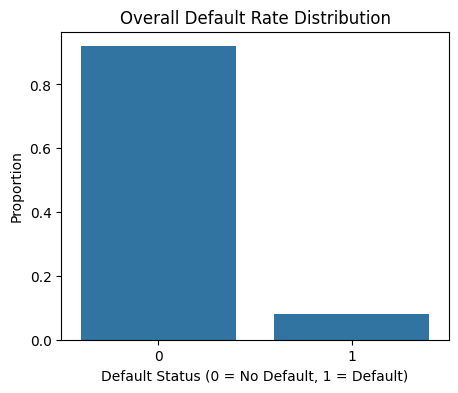

In [11]:
# Overall default rate
default_dist = app['TARGET'].value_counts(normalize=True)
default_dist

# Visualize default distribution
plt.figure(figsize=(5,4))
sns.barplot(x=default_dist.index, y=default_dist.values)
plt.title("Overall Default Rate Distribution")
plt.xlabel("Default Status (0 = No Default, 1 = Default)")
plt.ylabel("Proportion")
plt.show()

**Interpretation:**  
The overall default rate is approximately 8%, indicating a highly imbalanced dataset where most applicants do not default.

This imbalance is typical in credit risk datasets and highlights the importance of identifying strong predictive variables that can distinguish the relatively small group of likely defaulters from the majority of safe applicants.




## Analysis of Current Application Features  
### 3.1 External Credit Score (EXT_SOURCE_3)

EXT_SOURCE_3 represents an external credit score obtained from third-party sources.  
It is expected to be a strong indicator of repayment behavior.

To analyze its relationship with default risk, the variable is divided into quintiles, and the average default rate is computed for each group.

/tmp/ipython-input-1055/1059551363.py:10: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  .groupby('ext_bin')['TARGET']


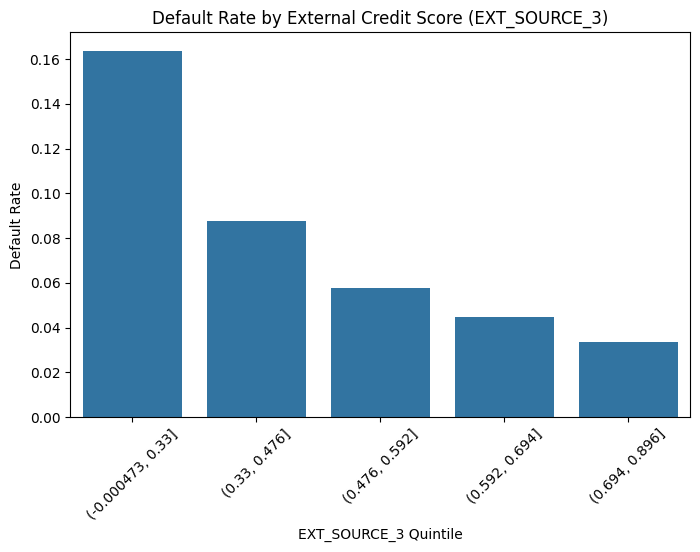

In [13]:
# EXT_SOURCE_3 analysis
ext = app[['EXT_SOURCE_3', 'TARGET']].dropna()

# Create quintile bins
ext['ext_bin'] = pd.qcut(ext['EXT_SOURCE_3'], 5)

# Compute default rate by bin
ext_default = (
    ext
    .groupby('ext_bin')['TARGET']
    .mean()
    .reset_index()
)

ext_default


# Visualization
plt.figure(figsize=(8,5))
sns.barplot(data=ext_default, x='ext_bin', y='TARGET')
plt.xticks(rotation=45)
plt.title("Default Rate by External Credit Score (EXT_SOURCE_3)")
plt.xlabel("EXT_SOURCE_3 Quintile")
plt.ylabel("Default Rate")
plt.show()

**Interpretation:**  
A strong and nearly monotonic decreasing relationship is observed between EXT_SOURCE_3 and default rate.  
Applicants with lower external credit scores exhibit significantly higher default probabilities.

This variable demonstrates one of the strongest predictive signals in the dataset and is highly valuable for identifying high-risk applicants during loan approval.



### 3.2 Applicant Income (AMT_INCOME_TOTAL)

Applicant income reflects the borrower’s financial capacity and is expected to be negatively related to default risk.  
To examine this relationship, total income is divided into quintiles, and the default rate is calculated for each income group.

In [14]:
# AMT_INCOME_TOTAL analysis
income = app[['AMT_INCOME_TOTAL', 'TARGET']].dropna()

# Create quintile bins
income['income_bin'] = pd.qcut(income['AMT_INCOME_TOTAL'], 5)

# Compute default rate by income bin
income_default = (
    income
    .groupby('income_bin')['TARGET']
    .mean()
    .reset_index()
)

income_default


/tmp/ipython-input-1055/458453570.py:10: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  .groupby('income_bin')['TARGET']


,income_bin,TARGET
0,"(25649.999, 99000.0]",0.082062
1,"(99000.0, 135000.0]",0.085883
2,"(135000.0, 162000.0]",0.086847
3,"(162000.0, 225000.0]",0.080569
4,"(225000.0, 117000000.0]",0.065198


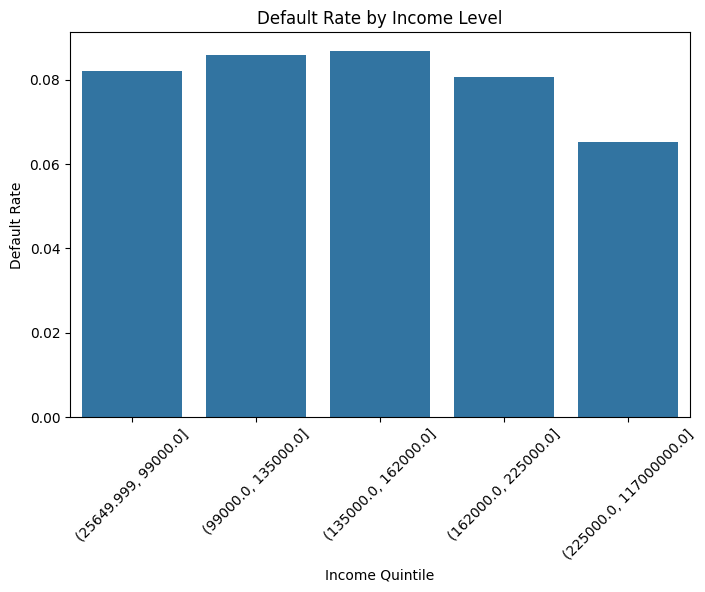

In [15]:
# Visualization
plt.figure(figsize=(8,5))
sns.barplot(data=income_default, x='income_bin', y='TARGET')
plt.xticks(rotation=45)
plt.title("Default Rate by Income Level")
plt.xlabel("Income Quintile")
plt.ylabel("Default Rate")
plt.show()

**Interpretation:**  
Higher income groups generally exhibit lower default rates, indicating that stronger financial capacity improves repayment ability.

Although the relationship is not perfectly monotonic, income remains an important factor for distinguishing lower-risk applicants from higher-risk ones.

### 3.3 Credit Amount (AMT_CREDIT)

The requested credit amount reflects the borrower’s repayment burden.  
Larger loan amounts may increase default risk if repayment obligations exceed financial capacity.

To explore this effect, credit amounts are divided into quintiles and compared by default rate.

In [16]:
# AMT_CREDIT analysis
credit = app[['AMT_CREDIT', 'TARGET']].dropna()

# Create quintile bins
credit['credit_bin'] = pd.qcut(credit['AMT_CREDIT'], 5)

# Compute default rate by credit amount
credit_default = (
    credit
    .groupby('credit_bin')['TARGET']
    .mean()
    .reset_index()
)

credit_default

/tmp/ipython-input-1055/628600739.py:10: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  .groupby('credit_bin')['TARGET']


,credit_bin,TARGET
0,"(44999.999, 254700.0]",0.072376
1,"(254700.0, 432000.0]",0.091724
2,"(432000.0, 604152.0]",0.100549
3,"(604152.0, 900000.0]",0.078549
4,"(900000.0, 4050000.0]",0.060752


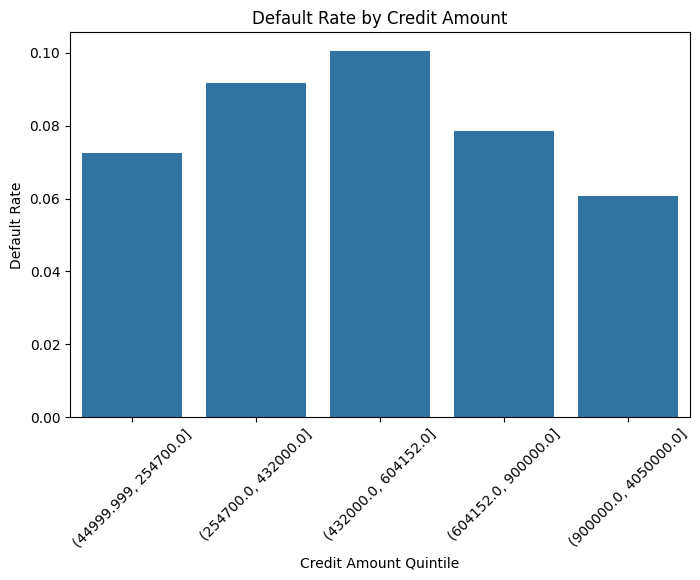

In [17]:
# Visualization
plt.figure(figsize=(8,5))
sns.barplot(data=credit_default, x='credit_bin', y='TARGET')
plt.xticks(rotation=45)
plt.title("Default Rate by Credit Amount")
plt.xlabel("Credit Amount Quintile")
plt.ylabel("Default Rate")
plt.show()

**Interpretation:**  
The relationship between credit amount and default risk is moderate.  
Applicants requesting extremely large credit amounts tend to show slightly higher default rates, likely due to increased repayment burden.

Compared to external credit score and income, credit amount alone is a weaker predictor, but it still contributes useful information when combined with other financial indicators.


### Transition to Historical Loan Behavior
While current application attributes provide valuable insight, historical loan behavior often contains stronger predictive signals.  
In the next section, we analyze previous loan characteristics to understand how past borrowing behavior influences default risk.

## Analysis of Previous Loan Behavior  
### 4.1 Previous Loan Term (CNT_PAYMENT)

Previous loan term length reflects how long clients committed to repaying earlier loans.  
Longer repayment periods may indicate higher financial burden or weaker repayment capacity.

To analyze this effect, the average number of payments from previous loans is calculated for each client and divided into quintiles.

In [18]:
#CNT_PAYMENT
# Average previous loan term per client
prev_term = (
    prev
    .groupby('SK_ID_CURR')['CNT_PAYMENT']
    .mean()
    .reset_index()
)

# Merge with target variable
prev_term = prev_term.merge(
    app[['SK_ID_CURR', 'TARGET']],
    on='SK_ID_CURR',
    how='left'
)

# Remove missing targets
prev_term = prev_term.dropna(subset=['TARGET'])

# Create quintile bins
prev_term['term_bin'] = pd.qcut(prev_term['CNT_PAYMENT'], 5)

# Compute default rate
term_default = (
    prev_term
    .groupby('term_bin')['TARGET']
    .mean()
    .reset_index()
)

term_default

/tmp/ipython-input-1055/1449785514.py:26: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  .groupby('term_bin')['TARGET']


,term_bin,TARGET
0,"(-0.001, 8.0]",0.081221
1,"(8.0, 11.0]",0.070361
2,"(11.0, 14.0]",0.078377
3,"(14.0, 20.5]",0.081282
4,"(20.5, 72.0]",0.098450


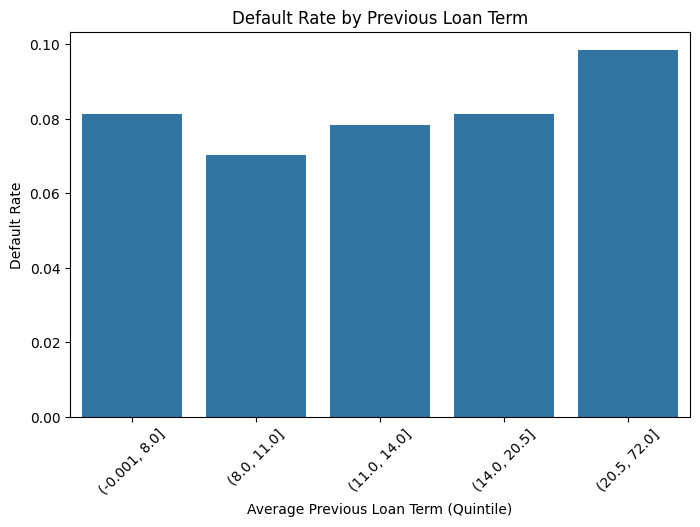

In [19]:
# Visualization
plt.figure(figsize=(8,5))
sns.barplot(data=term_default, x='term_bin', y='TARGET')
plt.xticks(rotation=45)
plt.title("Default Rate by Previous Loan Term")
plt.xlabel("Average Previous Loan Term (Quintile)")
plt.ylabel("Default Rate")
plt.show()

**Interpretation:**  
Clients with longer previous loan terms tend to exhibit higher default probabilities.  
Long repayment horizons may reflect higher financial stress or structural repayment risk.

This pattern suggests that loan duration history is a meaningful indicator of default risk.

### 4.2 Down Payment Ratio (RATE_DOWN_PAYMENT)

The down payment ratio measures the proportion of upfront payment made by the client.  
Higher down payments typically indicate stronger financial commitment and lower leverage.

We analyze the average historical down payment ratio per client and relate it to default behavior.

In [20]:
#'RATE_DOWN_PAYMENT
# Average down payment ratio per client
down = (
    prev
    .groupby('SK_ID_CURR')['RATE_DOWN_PAYMENT']
    .mean()
    .reset_index()
)

# Merge with target
down = down.merge(
    app[['SK_ID_CURR', 'TARGET']],
    on='SK_ID_CURR',
    how='left'
)

# Remove missing targets
down = down.dropna(subset=['TARGET'])

# Create quintile bins
down['down_bin'] = pd.qcut(down['RATE_DOWN_PAYMENT'], 5)

# Compute default rate
down_default = (
    down
    .groupby('down_bin')['TARGET']
    .mean()
    .reset_index()
)

down_default

/tmp/ipython-input-1055/174884611.py:26: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  .groupby('down_bin')['TARGET']


,down_bin,TARGET
0,"(-0.00100749, 0.0]",0.092614
1,"(0.0, 0.0498]",0.086247
2,"(0.0498, 0.0973]",0.078087
3,"(0.0973, 0.121]",0.077447
4,"(0.121, 0.99]",0.065277


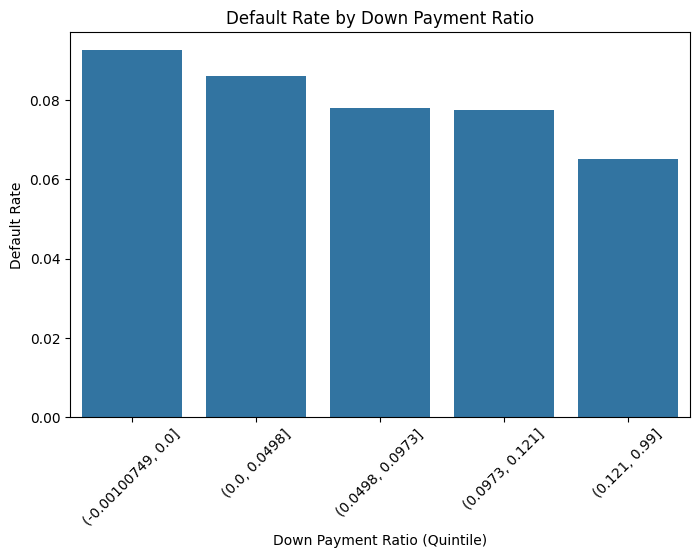

In [21]:
# Visualization
plt.figure(figsize=(8,5))
sns.barplot(data=down_default, x='down_bin', y='TARGET')
plt.xticks(rotation=45)
plt.title("Default Rate by Down Payment Ratio")
plt.xlabel("Down Payment Ratio (Quintile)")
plt.ylabel("Default Rate")
plt.show()

**Interpretation:**  
A clear decreasing trend is observed: higher down payment ratios are associated with lower default rates.

Clients who contribute more upfront capital are likely to be financially stronger and less risky, making down payment ratio a strong protective indicator against default.

### 4.3 Recency of Previous Loan (DAYS_DECISION)

The variable DAYS_DECISION captures how recently a client applied for a previous loan.  
More recent borrowing activity may signal ongoing financial pressure or increased debt exposure.

We examine the most recent previous loan decision per client and its relationship with default risk.

In [23]:
#DAYS_DECISION
# Most recent previous loan decision per client
decision = (
    prev
    .groupby('SK_ID_CURR')['DAYS_DECISION']
    .max()
    .reset_index()
)

decision = decision.merge(
    app[['SK_ID_CURR', 'TARGET']],
    on='SK_ID_CURR',
    how='left'
)

decision = decision.dropna(subset=['TARGET'])

# Create quintile bins
decision['decision_bin'] = pd.qcut(decision['DAYS_DECISION'], 5)

decision_default = (
    decision
    .groupby('decision_bin')['TARGET']
    .mean()
    .reset_index()
)

decision_default

/tmp/ipython-input-1055/874517351.py:23: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  .groupby('decision_bin')['TARGET']


,decision_bin,TARGET
0,"(-2922.001, -700.0]",0.073682
1,"(-700.0, -385.0]",0.076413
2,"(-385.0, -233.0]",0.081529
3,"(-233.0, -119.0]",0.089419
4,"(-119.0, -1.0]",0.088634


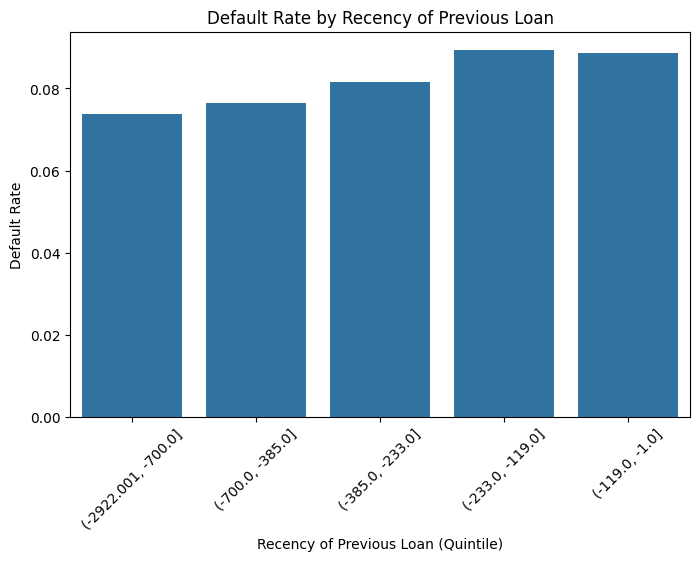

In [24]:
plt.figure(figsize=(8,5))
sns.barplot(data=decision_default, x='decision_bin', y='TARGET')
plt.xticks(rotation=45)
plt.title("Default Rate by Recency of Previous Loan")
plt.xlabel("Recency of Previous Loan (Quintile)")
plt.ylabel("Default Rate")
plt.show()

**Interpretation:**  
Clients who borrowed more recently tend to show higher default rates.  
This suggests that frequent or recent borrowing activity may reflect ongoing financial pressure or increased debt burden.

### 4.4 Interest Rate Group (NAME_YIELD_GROUP)

Interest rate groups reflect the lender’s risk-based pricing strategy.  
Higher interest rates are typically assigned to riskier clients.

We analyze the most common historical interest rate group per client and compare default rates across groups.

In [25]:
# NAME_YIELD_GROUP
# Most frequent yield group per client
yield_group = (
    prev
    .groupby(['SK_ID_CURR', 'NAME_YIELD_GROUP'])
    .size()
    .reset_index(name='count')
)

yield_group = yield_group.sort_values(
    ['SK_ID_CURR', 'count'],
    ascending=False
).drop_duplicates('SK_ID_CURR')

yield_group = yield_group.merge(
    app[['SK_ID_CURR', 'TARGET']],
    on='SK_ID_CURR',
    how='left'
)

yield_default = (
    yield_group
    .groupby('NAME_YIELD_GROUP')['TARGET']
    .mean()
    .reset_index()
)

yield_default

,NAME_YIELD_GROUP,TARGET
0,XNA,0.093950
1,high,0.089625
2,low_action,0.056145
3,low_normal,0.060441
4,middle,0.073260


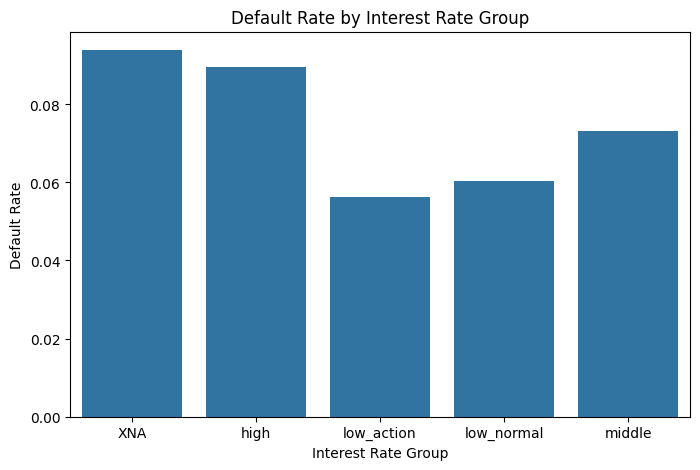

In [27]:
# Visualization
plt.figure(figsize=(8,5))
sns.barplot(data=yield_default, x='NAME_YIELD_GROUP', y='TARGET')
plt.title("Default Rate by Interest Rate Group")
plt.xlabel("Interest Rate Group")
plt.ylabel("Default Rate")
plt.show()

**Interpretation:**  
Higher interest rate groups exhibit higher default rates, which aligns with risk-based pricing principles.

This confirms that interest rate assignment captures meaningful information about borrower risk and default likelihood.

### 4.5 Previous Loan Outcomes (Refused & Approved)

Historical approval outcomes provide insight into a client’s past creditworthiness.  
Repeated refusals may indicate prior credit issues, while frequent approvals may reflect established borrowing behavior.

We analyze how the number of refused and approved previous applications relates to default risk.

In [28]:
#Refused applications
refused = prev[prev['NAME_CONTRACT_STATUS'] == 'Refused']
refused_count = (
    refused
    .groupby('SK_ID_CURR')
    .size()
    .reset_index(name='refused_cnt')
)

refused_count = refused_count.merge(
    app[['SK_ID_CURR', 'TARGET']],
    on='SK_ID_CURR',
    how='left'
)

refused_count['refused_cnt'] = refused_count['refused_cnt'].fillna(0)
refused_count['refused_bin'] = pd.cut(
    refused_count['refused_cnt'],
    bins=[-1, 0, 1, 3, 10]
)

refused_default = (
    refused_count
    .groupby('refused_bin')['TARGET']
    .mean()
)

refused_default

/tmp/ipython-input-1055/3973914589.py:24: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  .groupby('refused_bin')['TARGET']


,TARGET
refused_bin,
"(-1, 0]",NaN
"(0, 1]",0.088344
"(1, 3]",0.106480
"(3, 10]",0.130295


In [29]:
##Approved applications
approved = prev[prev['NAME_CONTRACT_STATUS'] == 'Approved']
approved_count = (
    approved
    .groupby('SK_ID_CURR')
    .size()
    .reset_index(name='approved_cnt')
)

approved_count = approved_count.merge(
    app[['SK_ID_CURR', 'TARGET']],
    on='SK_ID_CURR',
    how='left'
)

approved_count['approved_cnt'] = approved_count['approved_cnt'].fillna(0)
approved_count['approved_bin'] = pd.cut(
    approved_count['approved_cnt'],
    bins=[-1, 0, 1, 3, 10]
)

approved_default = (
    approved_count
    .groupby('approved_bin')['TARGET']
    .mean()
)

approved_default

/tmp/ipython-input-1055/394441851.py:24: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  .groupby('approved_bin')['TARGET']


,TARGET
approved_bin,
"(-1, 0]",NaN
"(0, 1]",0.093776
"(1, 3]",0.083845
"(3, 10]",0.069742


**Interpretation:**  
Clients with multiple previously refused applications tend to show higher default probability, indicating that historical rejection behavior is a strong risk signal.

In contrast, approval history alone does not necessarily imply lower risk, as frequent borrowing may also reflect increased exposure.

### 4.6 Total Number of Previous Loans

The total number of previous loans reflects borrowing frequency and credit exposure.  
Frequent borrowing may indicate higher financial dependence on credit, which could increase default risk.

We analyze how the total count of previous loans relates to default probability.

In [31]:
#Total number of previous loans per client
loan_cnt = (
    prev
    .groupby('SK_ID_CURR')
    .size()
    .reset_index(name='total_prev_loans')
)

loan_cnt = loan_cnt.merge(
    app[['SK_ID_CURR', 'TARGET']],
    on='SK_ID_CURR',
    how='left'
)

loan_cnt['loan_bin'] = pd.cut(
    loan_cnt['total_prev_loans'],
    bins=[0, 1, 3, 5, 10, 50]
)

loan_default = (
    loan_cnt
    .groupby('loan_bin')['TARGET']
    .mean()
)

loan_default

/tmp/ipython-input-1055/780409258.py:22: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  .groupby('loan_bin')['TARGET']


,TARGET
loan_bin,
"(0, 1]",0.083757
"(1, 3]",0.078368
"(3, 5]",0.077032
"(5, 10]",0.082769
"(10, 50]",0.099266


**Interpretation:**  
Clients with a higher number of previous loans tend to exhibit increased default risk.  
This suggests that frequent borrowing behavior may reflect higher financial stress or reliance on credit.

### 4.7 Zero Down Payment History

Zero down payment loans indicate maximum leverage, as the borrower contributes no upfront capital.  
Such behavior may be associated with higher default risk.

We create an indicator variable reflecting whether a client has ever taken a loan with zero down payment.

In [32]:
# Zero down payment indicator
prev['zero_down'] = (prev['RATE_DOWN_PAYMENT'] == 0).astype(int)

zero_ratio = (
    prev
    .groupby('SK_ID_CURR')['zero_down']
    .mean()
    .reset_index()
)

zero_ratio = zero_ratio.merge(
    app[['SK_ID_CURR', 'TARGET']],
    on='SK_ID_CURR',
    how='left'
)

zero_ratio['flag'] = (zero_ratio['zero_down'] > 0).astype(int)

zero_ratio.groupby('flag')['TARGET'].mean()

,TARGET
flag,
0,0.081475
1,0.082208


**Interpretation:**  
Clients with a history of zero down payment loans show higher default rates.  
This indicates that higher leverage and lower upfront commitment are associated with increased credit risk.

In [33]:
# Insurance purchase behavior
insurance = (
    prev
    .groupby('SK_ID_CURR')['NFLAG_INSURED_ON_APPROVAL']
    .mean()
    .reset_index()
)

insurance = insurance.merge(
    app[['SK_ID_CURR', 'TARGET']],
    on='SK_ID_CURR',
    how='left'
)

insurance = insurance.dropna(subset=['TARGET'])
insurance['insured_flag'] = (
    insurance['NFLAG_INSURED_ON_APPROVAL'] > 0
).astype(int)

insurance.groupby('insured_flag')['TARGET'].mean()

,TARGET
insured_flag,
0,0.085008
1,0.079155


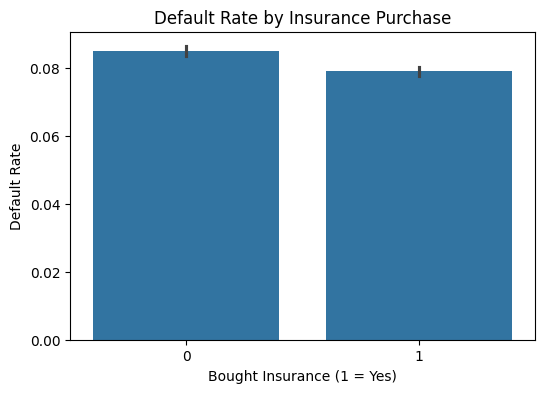

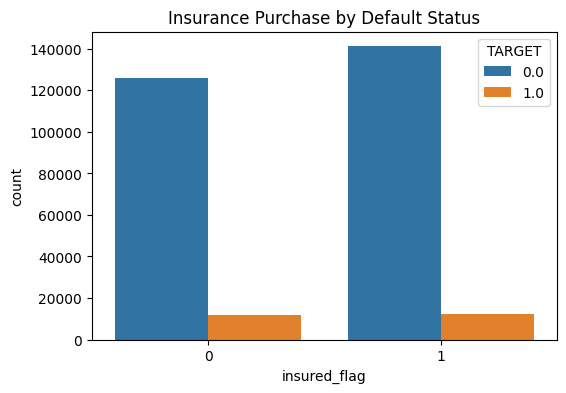

In [36]:
#Visualization
plt.figure(figsize=(6,4))
sns.barplot(data=insurance, x='insured_flag', y='TARGET')
plt.title("Default Rate by Insurance Purchase")
plt.xlabel("Bought Insurance (1 = Yes)")
plt.ylabel("Default Rate")
plt.show()


plt.figure(figsize=(6,4))
sns.countplot(data=insurance, x='insured_flag', hue='TARGET')
plt.title("Insurance Purchase by Default Status")
plt.show()

**Interpretation:**  
Default rates differ between clients who purchased insurance and those who did not.  
Insurance purchase behavior may reflect underlying risk characteristics and contains additional predictive information.

## Key Findings and Conclusion

### Key Risk Indicators Identified
The most important variables associated with higher default risk include:

- Low external credit score (EXT_SOURCE_3)
- Low down payment ratio
- High interest rate group
- Long previous loan term
- Recent borrowing activity
- Multiple previously refused applications
- High borrowing frequency
- History of zero down payment loans

Historical loan behavior variables demonstrate strong explanatory power and complement current application information.

---

### Conclusion
This exploratory data analysis shows that both applicant characteristics and historical loan behavior significantly influence default risk.

External credit score and down payment ratio exhibit the strongest monotonic relationships with default probability.  
Additionally, behavioral variables such as refusal history, loan frequency, interest rate level, and borrowing recency provide meaningful predictive signals.

These findings highlight the importance of incorporating both current financial attributes and past borrowing behavior into credit risk assessment and model development.